In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv("../bank.csv") 
# Decision Tree CLassifier

# A partir del E.D.A realizado en la regr.logistica, actualizar dataset para que solo queden las columnas numericas continuas. Ademas, aseguramos que este todo okey para realizar el modelo con su prediccion

In [12]:
columnas_a_usar= ["age", "balance", "day", "duration", #numericas
                  "deposit"] #variable a predecir

data_actualizado = data[columnas_a_usar]

#convertir la columna a predecir en binaria (numerica) 
data_actualizado['deposit'] = data_actualizado['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

data[columnas_a_usar].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       11162 non-null  int64 
 1   balance   11162 non-null  int64 
 2   day       11162 non-null  int64 
 3   duration  11162 non-null  int64 
 4   deposit   11162 non-null  object
dtypes: int64(4), object(1)
memory usage: 436.1+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_13980\1699281160.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actualizado['deposit'] = data_actualizado['deposit'].apply(lambda x: 1 if x == 'yes' else 0)


In [13]:
data_actualizado.head(2)

,age,balance,day,duration,deposit
0,59,2343,5,1042,1
1,56,45,5,1467,1


In [14]:
# Distribución de las variables numéricas
data_actualizado[["age", "balance", "day", "duration"]].describe()

,age,balance,day,duration
count,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818
std,11.913369,3225.413326,8.420740,347.128386
min,18.000000,-6847.000000,1.000000,2.000000
25%,32.000000,122.000000,8.000000,138.000000
50%,39.000000,550.000000,15.000000,255.000000
75%,49.000000,1708.000000,22.000000,496.000000
max,95.000000,81204.000000,31.000000,3881.000000


# Dividir el data set y Train Test Split

In [17]:
# Separamos las variables predictoras de la variable a predecir
X = data_actualizado.drop(columns=[ "deposit"])
y = data_actualizado["deposit"]

In [18]:
#dividir el dataset en train, val y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [21]:
#chequear si hay nan 
X_train.isna().sum()

age         0
balance     0
day         0
duration    0
dtype: int64

# Decission Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_accuracy)
print("Validation accuracy:", val_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 1.0
Validation accuracy: 0.6981639050604568
Test accuracy: 0.6820420958351993


### podemos ver como hay un claro overfitting. El modelo se ajusta demasiado a los datos de entrenamiento pero luego, con otros datos de la vida real, predice medio mal

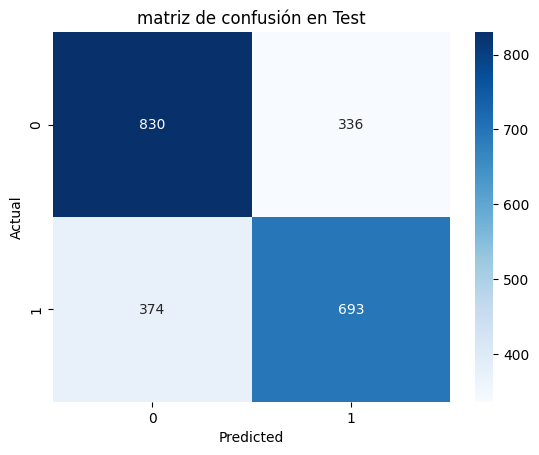

In [30]:
# Matriz de confusión sobre los datos de Test
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('matriz de confusión en Test') 
plt.show()

830 verdaderos negativos    -----------------            336 falsos negativos

374 falsos positivos        -------------------------             693 verdaderos positivos

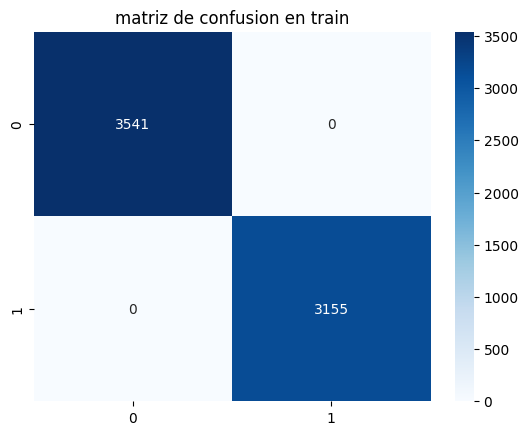

In [31]:
# Matriz de confusión sobre los datos de Train
conf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('matriz de confusion en train')
plt.show()



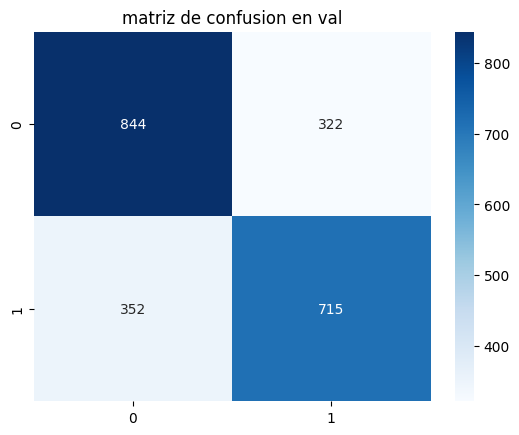

In [32]:
#matriz de confusion en val
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('matriz de confusion en val')
plt.show()

## Performance del modelo

In [33]:
#performance haciendo uso de las metricas Precision, Recall, F1-score y Support
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1166
           1       0.67      0.65      0.66      1067

    accuracy                           0.68      2233
   macro avg       0.68      0.68      0.68      2233
weighted avg       0.68      0.68      0.68      2233



# #roc auc score y su curva

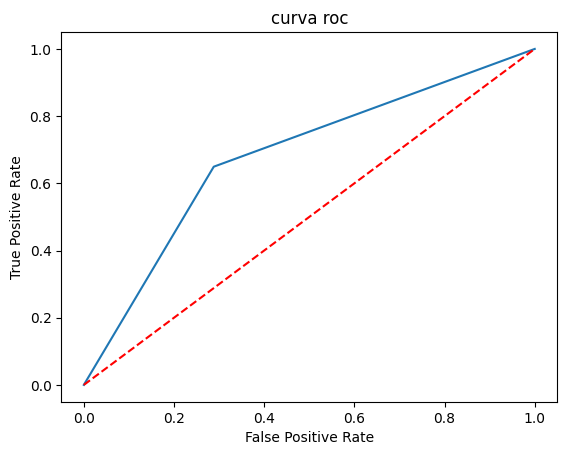

roc auc score: 0.6806599352796591


In [44]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

#grafico de la curva roc
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_auc) #curva roc
plt.plot([0, 1], [0, 1],'r--') # linea base
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('curva roc')
plt.show()

#printear el score de roc auc
print("roc auc score:", roc_auc)

# Feature Importances

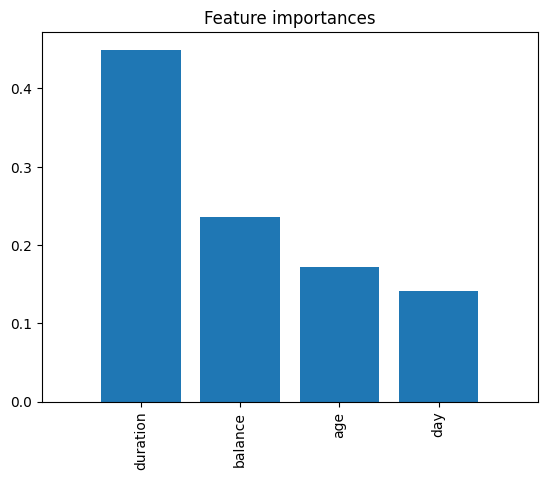

In [46]:
#Feature Importances ordenadas de mayor a menor
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [49]:
! pip3 install pydotplus


"pip3" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


# dibujar el arbol

In [52]:
import pydotplus
from six import StringIO
from IPython.display import Image, display
from sklearn.tree import export_graphviz

def dibujar_arbol(clf, f_name=X_train.columns, c_name=["0", "1"]):

    dot_data = StringIO()

    export_graphviz(
        clf,
        out_file=dot_data,
        filled=True,
        class_names=c_name,
        feature_names=f_name,
        special_characters=True,
    )

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))


arbol = DecisionTreeClassifier(max_depth=5)
arbol.fit (X_train, y_train)
dibujar_arbol (arbol, c_name = y_train.columns, f_name = X_train.columns)


ModuleNotFoundError: No module named 'pydotplus'